In [1]:
# pandas는 pytho으로 데이터분석을 하기 위한 최적의 module

# pandas는 새로 정의된 2가지 데이터 타입 사용

# series: NumPy의 1차원 array와 유사
# DataFrame: series를 모아모아 table 형태로 구성한 자료구조 
# Pandas를 이용하기 위해서는 module 설치부터 해야 함! 

# conda install pandas
# anaconda prompt 열고 
# > activate cpu_env
# > conda install pandas

import numpy as np
import pandas as pd


In [ ]:
### Series를 생성해 보자! 
## NumPy array (ndarray)와 비교해서 확인 

## Review
# 먼저 ndarray부터 다시 한번 알아보자 
# list가지고 ndarray 만들 수 있음 
arr = np.array([-1,5,8,10])  
print(arr.dtype)   # int32
# 타입 바꾸려면 ndarray 만들 때 dtype 명시해주면 됨
arr = np.array([-1,5,8,10],dtype=np.float64)
arr = np.array([-1,5,8,10],dtype="float64")
# 다른 타입을 섞어서 사용 가능??
arr = np.array([-1,3.14,"hello"])  # 가능? => 가능하긴 하나 다 같은 데이터 타입으로 바꿔줌 => 데이터타입은 유니코드 
# 첫번째 칸에는 float, 두번째는 int ,... 가능? => 불가능할것 같으나 가능.
arr = np.array([-1,3.14,"hello"],dtype=np.object)
print(arr)          # [-1 3.14 'hello']
print(arr.dtype)    # object
print(arr[1])       # 3.14
print(type(arr[1])) # float



In [21]:
### Series를 생성해 보자! 

s = pd.Series([-1,5,3.14,'hello'],dtype=np.object)    # Series는 같은 데이터 타입이 와야 함 
s = pd.Series([-1,5,3.14,'hello'],dtype="object")
print(s)
# 0       -1
# 1        5
# 2     3.14
# 3    hello
# dtype: object
print("="*30)   # =이라는 문자열을 30번 더해서 붙여라 (그냥 결과 나눠서 볼려공)

## 1. Series의 value 부분 출력
print("Series의 value부분:{}".format(s.values))  # [-1 5 3.14 'hello']

# value부분 ndarray같음 => 뭘로 구성되어있는지 알아보기 위해 type을 찍어보자.
print("Series의 value부분 type:{}".format(type(s.values)))   # numpy.ndarray

## 2. Series의 data type (dtype)
print("Series의 value 부분 dtype:{}".format(s.values.dtype))  # object
print("Series의 value 부분 dtype:{}".format(s.dtype)) # object  # 이렇게 사용해도 결과 같음! 

## 3. Series의 index 부분 출력
print("Series의 index 부분:{}".format(s.index)) # RangeIndex(start=0, stop=4, step=1) 
print("Series의 index 부분 type:{}".format(type(s.index)))   # pandas.core.indexes.range.RangeIndex



0       -1
1        5
2     3.14
3    hello
dtype: object
Series의 value부분:[-1 5 3.14 'hello']
Series의 value부분 type:<class 'numpy.ndarray'>
Series의 value 부분 dtype:object
Series의 value 부분 dtype:object
Series의 index 부분 dtype:RangeIndex(start=0, stop=4, step=1)
Series의 index 부분 dtype:<class 'pandas.core.indexes.range.RangeIndex'>


In [27]:
## Series는 index를 따로 지정할 수 있음! 
s = pd.Series([-1,5,8,10],
              dtype=np.int32,
              index=["a","c","k","f"])   # 숫자 인덱스 대신 내가 지정한 인덱스를 넣을 수 있음
print(s)

# index를 이용해서 값 access하기 
# 숫자 index 
print(s[1])    # 5   => 숫자인덱스는 기본으로 사용 가능
print(s["k"])  # 8  

# index가 겹치면 어떻게 될까?  => 가능 
s = pd.Series([-1,5,8,10],
              dtype=np.int32,
              index=["k","c","k","f"]) 
print(s["k"]) 
# k   -1
# k    8
# 사용 가능!!! 주의!! 
# 만약 찾으려는 인덱스가 2개 이상 존재할 경우, 그 결과가 Series로 return 


a    -1
c     5
k     8
f    10
dtype: int32
5
8
k   -1
k    8
dtype: int32


In [35]:
s = pd.Series([-1,5,8,10],
              dtype=np.int32,
              index=["a","c","k","f"])  

# ndarray에서 indexing도 사용할 수 있고 slicing도 사용 가능 
# Series도 slicing 이용할 수 있음 
print(s[0:2])   # Series가 return
# a   -1
# c    5
print(s["a":"k"])
# a   -1
# c    5   
# k    8    => 숫자 indexing과 같은 결과! But, 뒤의 값도 inclusive
# 범위에 주의하기 ! !

# 값들 중 짝수만 출력하고 싶다 => Boolean index 사용하기 
print(s[s%2==0])   # 2를 broadcasting 시켜서 4개로 만듦 -> 각각 나눠줌 -> 0과 비교 
# k     8
# f    10

# -1과 8만 출력하고 싶다 => Fancy index 사용
print(s[[0,2]])
# a   -1
# k    8

# s가 가지고 있는 값의 전체 합계 구하고 싶다 => 집계함수 
print(s.sum())  # 22  # ndarray의 집계함수를 그대로 다 이용 가능 


a   -1
c    5
dtype: int32
a   -1
c    5
k    8
dtype: int32
k     8
f    10
dtype: int32
a   -1
k    8
dtype: int32
22


In [42]:
# for문 
# for문을 list를 만드는 데 사용할 수 있음 
myList = [1,2,3,4]
# 생성하고 싶은 list: 각 요소에 *2를 한 list   => [2,4,6,8]
result = myList*2 
print(result)    # list끼리 곱하면 뒤에 붙음.. list는 vector가 아님. 
# [1, 2, 3, 4, 1, 2, 3, 4]
# 제대로 계산되려면 vector의 성질을 가져야 계산됨(ndarray같이)

# 1. for문을 사용해서 해보자. => 효율 X
result = list()
for i in myList:
    result.append(i*2)
print(result)    # [2, 4, 6, 8]

# 2.list안에 for문 돌리기 
result = [x*2 for x in myList]   # x*2를 가져오는데 그걸 for문 만큼 반복한다. for문에서 x가져와서 x*2하는 것
print(result)    # [2, 4, 6, 8]

result = [x*2 for x in myList if x>2]   # for문에서 x가져오는데 조건 만족하는거만 앞으로 넘겨
print(result)    # [6, 8]

## => tuple, dict에도 똑같이 적용 가능 
result = { "stu"+str(x): x**2  for x in range(0,10) }   # key:value형태로 작성. for문을 10번 돌려라 
print(result)
# {'stu0': 0, 'stu1': 1, 'stu2': 4, 'stu3': 9, 'stu4': 16, 'stu5': 25, 'stu6': 36, 'stu7': 49, 'stu8': 64, 'stu9': 81}



[1, 2, 3, 4, 1, 2, 3, 4]
[2, 4, 6, 8]
[2, 4, 6, 8]
[6, 8]
{'stu0': 0, 'stu1': 1, 'stu2': 4, 'stu3': 9, 'stu4': 16, 'stu5': 25, 'stu6': 36, 'stu7': 49, 'stu8': 64, 'stu9': 81}


In [51]:
# 날짜 - 많이 사용되는 데이터 타입 
from datetime import date, datetime

# 오늘 날짜를 구해보자! 
today = date.today()   # 시스템에 설정된 오늘 날짜를 구해오자
print(today)
print(type(today))     # datetime.date

print("연도:{}".format(today.year))   # today의 year 속성을 이용하면 연도만 가져올 수 있음
print("월:{}".format(today.month)) 
print("일:{}".format(today.day)) 

# 시간? date는 날짜까지 구할 수 있고, datetime은 시간까지 구할 수 있음
today = datetime.today()   # 년월일 시분초
print(today)
print(type(today))   # datetime.datetime
print("연도:{}".format(today.year))   
print("월:{}".format(today.month)) 
print("일:{}".format(today.day)) 
print("시:{}".format(today.hour)) 
print("분:{}".format(today.minute))
print("초:{}".format(today.second))
print("마이크로초:{}".format(today.microsecond)) 



2019-11-20
<class 'datetime.date'>
연도:2019
월:11
일:20
2019-11-20 10:45:40.741190
<class 'datetime.datetime'>
연도:2019
월:11
일:20
시:10
분:45
초:40
마이크로초:741190


In [52]:
# 1. timedelta => 날짜 조절 => years, months는 안됨!!!! 
# => weeks, days, hours, minutes, seconds 등 사용 가능 
from datetime import date, datetime, timedelta

today = datetime.today()
print(today)
# 하루 전 날짜를 출력해보자
day = timedelta(days=-1)  # days=-1 : 하루 전, days=1 다음날 days=2 내일모레 ...
result = today+day  # 오늘날짜에 하루전날짜를 더함
print(result) # 하루전 날짜 나옴 


# 2. relativedelta => months, years도 사용 가능! 

from dateutil.relativedelta import relativedelta

today = datetime.today()
print(today)
day = relativedelta(months=-1) 
result = today+day  
print(result) 


2019-11-20 11:03:15.054387


In [57]:
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

# 오늘 날짜 3월 31일 => 1달 전: 2월 28일, 2월 29일 등으로 
# 오늘날짜를 3월 31일로 설정해보자. 
from dateutil.parser import parse   # 오늘 날짜를 다른 날짜로 설정해주기 위해 가져옴 
today = parse("2019-03-31")
print("오늘의 날짜:{}".format(today))
day = relativedelta(months=-1)  # 1달 전 설정
print(today+day)


오늘의 날짜:2019-03-31 00:00:00
2019-02-28 00:00:00


In [75]:
## A공장의 2019-01-01부터 10일간 제품생산량을 Series로 저장 
## 생산량은 랜덤으로 결정. 평균이 50이고 표준편차가 5인 정규분포에서 랜덤하게 추출(정수로 사용)
## series의 형식 2019-01-01 53    (index를 날짜로 사용해라)
##               2019-01-02 58

## B공장의 2019-01-01부터 10일간 제품생산량을 Series로 저장 
## 생산량은 랜덤으로 결정. 평균이 70이고 표준편차가 8인 정규분포에서 랜덤하게 추출(정수로 사용)

## 모든 공장의 날짜별 생산량(합계)을 구하시오. 

from dateutil.parser import parse   # 오늘 날짜를 다른 날짜로 설정
today = parse("2019-01-01")

listDate = [today+relativedelta(days=i) for i in range(10)]


myMeanA = 50; myStdA = 5
arrA = np.random.normal(myMeanA, myStdA, (10,))   
arrA = arrA.astype(np.int32)
listA = list(arrA)
sA = pd.Series(listA,index=listDate)
print(sA)

myMeanB = 50; myStdB = 7
arrB = np.random.normal(myMeanB, myStdB, (10,))   
arrB = arrB.astype(np.int32)
listB = list(arrB)
sB = pd.Series(listB,index=listDate)


# s = pd.merge(sA,sB,on="key")
# print(s)



# s = pd.Series(listA,listB,index=listDate)
# print(s)

2019-01-01    53
2019-01-02    51
2019-01-03    52
2019-01-04    46
2019-01-05    52
2019-01-06    43
2019-01-07    50
2019-01-08    52
2019-01-09    55
2019-01-10    60
dtype: int64


In [87]:
### 선생님 답
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta
from dateutil.parser import parse

# start_day = parse("2019-01-01")
start_day = datetime(2019,1,1)  # 이렇게 써도 같음
# A공장 
factoryA = pd.Series([int(x) for x in np.random.normal(50,5,(10,))],
                    index = [start_day+timedelta(days=i) for i in range(10)])
# B공장
factoryB = pd.Series([int(x) for x in np.random.normal(70,8,(10,))],
                    index = [start_day+timedelta(days=i) for i in range(10)])

print("="*10+"Factory A"+"="*10)
print(factoryA)
print("="*10+"Factory B"+"="*10)
print(factoryB)
print("="*9+"Factory A+B"+"="*9)
print(factoryA+factoryB)



==========Factory A==========
2019-01-01    44
2019-01-02    50
2019-01-03    54
2019-01-04    36
2019-01-05    50
2019-01-06    59
2019-01-07    46
2019-01-08    52
2019-01-09    42
2019-01-10    43
dtype: int64
==========Factory B==========
2019-01-01    75
2019-01-02    61
2019-01-03    67
2019-01-04    80
2019-01-05    66
2019-01-06    70
2019-01-07    66
2019-01-08    63
2019-01-09    60
2019-01-10    65
dtype: int64
=========Factory A+B=========
2019-01-01    119
2019-01-02    111
2019-01-03    121
2019-01-04    116
2019-01-05    116
2019-01-06    129
2019-01-07    112
2019-01-08    115
2019-01-09    102
2019-01-10    108
dtype: int64


In [160]:
### 시작일이 다를 경우 ? 
np.random.seed(1)
# start_day = parse("2019-01-01")
start_day = datetime(2019,1,1)  # 이렇게 써도 같음
start_day2 = datetime(2019,1,5)  # 이렇게 써도 같음
# A공장 
factoryA = pd.Series([int(x) for x in np.random.normal(50,5,(10,))],
                    index = [start_day+timedelta(days=i) for i in range(10)])
# B공장
factoryB = pd.Series([int(x) for x in np.random.normal(70,8,(10,))],
                    index = [start_day2+timedelta(days=i) for i in range(10)])

print(factoryA+factoryB)  # 이렇게 하면 겹치는 곳만 답이 나옴


# 선생님 답
index_a = set(factoryA.index)
index_b = set(factoryB.index)

index_a_b = index_a - index_b  # factoryB에 추가
index_b_a = index_b - index_a  # factoryA에 추가

for i in index_a_b:
    factoryB[i]=0
for i in index_b_a:
    factoryA[i]=0
print(factoryA+factoryB)





#s = factoryA.index.values.strftime('%Y-%m-%d')
# 내풀이 -문제... factoryA[i]가 빈경우 문제..

setA = set(factoryA.index)
setB = set(factoryB.index)
setAB = setA.update(setB)


# factoryAB = pd.Series( [(factoryA[i]+factoryB[i]) for i in setAB] ,index=setAB )
# print(factoryAB)


print(factoryA)
print(factoryA.add(factoryB))



2019-01-01      NaN
2019-01-02      NaN
2019-01-03      NaN
2019-01-04      NaN
2019-01-05    135.0
2019-01-06     91.0
2019-01-07    125.0
2019-01-08    112.0
2019-01-09    130.0
2019-01-10    109.0
2019-01-11      NaN
2019-01-12      NaN
2019-01-13      NaN
2019-01-14      NaN
dtype: float64
2019-01-01     58
2019-01-02     46
2019-01-03     47
2019-01-04     44
2019-01-05    135
2019-01-06     91
2019-01-07    125
2019-01-08    112
2019-01-09    130
2019-01-10    109
2019-01-11     68
2019-01-12     62
2019-01-13     70
2019-01-14     74
dtype: int64
2019-01-01    58
2019-01-02    46
2019-01-03    47
2019-01-04    44
2019-01-05    54
2019-01-06    38
2019-01-07    58
2019-01-08    46
2019-01-09    51
2019-01-10    48
2019-01-11     0
2019-01-13     0
2019-01-14     0
2019-01-12     0
dtype: int64
2019-01-01     58
2019-01-02     46
2019-01-03     47
2019-01-04     44
2019-01-05    135
2019-01-06     91
2019-01-07    125
2019-01-08    112
2019-01-09    130
2019-01-10    109
2019-01-1

In [170]:
# Series를 생성할 때 list를 이용해서 만듦!

# dict(Dictionary)를 이용해서 Series를 생성할 수 있음

import numpy as np
import pandas as pd

my_dict = {"서울":1000,"부산":3000,"제주":5000}
s = pd.Series(my_dict)

# 논리적인 이름 붙이기
s.name = "지역별 가격 데이터"   # 해당 series 자체에 논리적인 이름 
s.index.name="지역명"  # 인덱스 의미
print(s)





지역명
서울    1000
부산    3000
제주    5000
Name: 지역별 가격 데이터, dtype: int64


In [13]:
### 1121 - DataFrame
# dataframe을 만드는 가장 간단한 방법 

import numpy as np
import pandas as pd

# DataFrame을 위한 dict를 만들어보자! 
data =  {"names":["홍길동","김길동"],  # 학생이름
         "year": [2015, 2016],      # 입학연도
         "points":[3.9, 4.5] }     # 평균평점

# DataFrame
df = pd.DataFrame(data)
display(df)   # DataFrame은 print 대신에 display() 이용
# series에서는 name이 index로 되었지만 여기서는 column으로???들어감

# Series
s = pd.Series(data) # key값이 index로 빠지고 value가 list로 잡힘.
print(s)

# 만약 size 안맞을경우 => 에러!  => np.nan은 채워줘야 함
data =  {"names":["홍길동","김길동","신사임당"],  
         "year": [2015, 2016, np.nan],      
         "points":[3.9, 4.5] }     

## dataframe은 series의 집합! => 각 컬럼이 series 
print(df["names"])  # => series로 나옴 (index 나옴)

print(df.values)  # 2차원 형태의 ndarray로 표현

# DataFrame의 shape
print(df.shape)   # = print(df.values.shape) 
# DataFrame안의 모든 요소 개수
print(df.size)  #  = print(df.values.size)
# 
print(df.ndim)  # 무조건 2 (2차원이므로)







,names,year,points
0,홍길동,2015,3.9
1,김길동,2016,4.5


names       [홍길동, 김길동]
year      [2015, 2016]
points      [3.9, 4.5]
dtype: object
0    홍길동
1    김길동
Name: names, dtype: object
[['홍길동' 2015 3.9]
 ['김길동' 2016 4.5]]
(2, 3)


In [16]:
import numpy as np
import pandas as pd

data =  {"names":["홍길동","김길동"],  
         "year": [2015, 2016],      
         "points":[3.9, 4.5] }     
df = pd.DataFrame(data)
display(df)   
 
print("DataFrame의 index : {}".format(df.index))  # RangeIndex(start=0, stop=2, step=1)
print("DataFrame의 index[0] : {}".format(df.index[0]))  # 0
print("DataFrame의 column:{}".format(df.columns))  # list처럼 사용하면 됨  # Index(['names', 'year', 'points'], dtype='object')
print("DataFrame의 column[1]:{}".format(df.columns[1]))  # year









,names,year,points
0,홍길동,2015,3.9
1,김길동,2016,4.5


DataFrame의 index : RangeIndex(start=0, stop=2, step=1)
DataFrame의 index[0] : 0
DataFrame의 column:Index(['names', 'year', 'points'], dtype='object')
DataFrame의 column[1]:year


In [16]:
# DataFrame의 index와 column에 이름을 부여해 보자!

import numpy as np
import pandas as pd

data =  {"names":["홍길동","김길동"],  
         "year": [2015, 2016],      
         "points":[3.9, 4.5] }     
df = pd.DataFrame(data)
display(df)   
 
# Series처럼 index, column 이름 부여 가능
df.index.name="sNum"
df.columns.name = "학생정보"

# 간단하게 literal 형태로 DataFrame을 생성해보자.









,names,year,points
0,홍길동,2015,3.9
1,김길동,2016,4.5


DataFrame의 index : RangeIndex(start=0, stop=2, step=1)
DataFrame의 index[0] : 0
DataFrame의 column:Index(['names', 'year', 'points'], dtype='object')
DataFrame의 column[1]:year


In [17]:
## DataFrame을 생성하는 방법
# file(CSV)로부터 데이터를 읽어와서 DataFrame을 생성

# python_DA에 data 폴더 만들어서 student.csv 파일 생성하기 => edit
import numpy as np
import pandas as pd

df = pd.read_csv("./data/student.csv")   # .은 현재 폴더를 의미(08_pandas 파일의 밑에 있는 data 폴더 찾아서 student읽어와라)
display(df)



,이름,입학연도,성적
0,홍길동,2014,3.5
1,최길동,2017,4.2
2,신사임당,2013,4.1
3,강감찬,2011,1.3


In [22]:
# MovieLens Data File을 이용해서 DataFrame을 생성해보자! 
# ratings.csv
# movies.csv

import numpy as np
import pandas as pd

df = pd.read_csv("./data/movies.csv")
display(df.head())
display(df.tail())

print(df.shape)  # (9742, 3)
 


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


(9742, 3)


In [26]:
# 의도치 않은 에러가 발생될 경우 있음! 
# 프로그래밍 단계에서는 문제가 없지만 실행시 문제가 되는 코드들이 있음 

# exception handling
try:
    10/0  # Exception이 발생 => 극복해서 프로그램이 중지되지 않도록 처리해보자
except Exception as inst:   # 예외사항에 대한 내용을 출력
    print(inst) 
finally:     # 예외 있건 없건 무조건 수행
    print("hoho")
    
# 프로그램 계속 진행 


division by zero
hoho


In [46]:
## Database에서 SQL로 데이터를 추출해서 pandas의 DataFrame으로 생성 
# 사용하는 DBMS는 MySQL, 사용하는 데이터는 book table
# 데이터베이스(DBMS)는 강사용 컴퓨터 이용 ( 전에 깔려있으면 그대로 이용해도 됨 )

## 내걸로 이용하려면 cmd창에서 
# > cd C:\Users\student\Desktop\mysql-5.6.46-winx64\bin
# > mysqld
## 아니면 강사용 컴퓨터 70.12.116.160

## anaconda prompt 에서
# > activate cpu_env 
# > conda pymysql
import pymysql.cursors  # MySQL DBMS를 사용하기 위한 module로딩

import numpy as np
import pandas as pd

# 데이터베이스 connection 
#conn = pymysql.connect(host="localhost")  # 내꺼 깔려있으면 
conn = pymysql.connect(host="70.12.116.160",  # 강사용에 접속
                       user = "data",
                       password = "data",
                       db = "library", 
                       charset ="utf8")


keyword = "여행"
# database에서 data를 가져오기 위한 SQL을 작성
# 책 제목에 keyword가 들어있는 행을 찾아서 제목, 가격, 저자정보를 가져옴 
sql = "select btitle,bprice,bauthor "+"from book"  # select선택하겠다 - 컬럼명들  / book이라는 table로부터 가져오겠다
# => 줄을 띄면 오류뜸 => 해결방법 2가지
# 1. 
sql = ("select btitle,bprice,bauthor "+
       "from book")   # 좋은 방법 아님!!
# 2. 
sql =  "select btitle,bprice,bauthor "+\
        "from book "+\
        "where btitle like '%{}%'".format(keyword)
# \는 길어지니 밑에서 쓰겠다는 표시   # 맨뒤에 한 칸 띄어야 함  # \ 뒤에 주석 붙이면 안도미 

try:
    df = pd.read_sql(sql, conn)  # conn이라는 연결정보 통해서 sql 데이터
    display(df)
    # 정상적으로 데이터프레임을 얻어왔으면 JSON File로 저장
    df.to_json("./data/book_columns.json", orient="columns")  # orient:방향. 어떤 형태로 만들건지
    # => json 파일 만들어짐 (크롬에 드래그해서 열기)
    # 각 칼럼을 key값으로 넣는 것
    df.to_json("./data/book_records.json", orient="records") 
    # 각 행을 json 하나씩으로 넣은 것 
    df.to_json("./data/book_index.json", orient="index")         
    # 0,1,2가 key값으로 잡힘 => 가장 쓸모없음. 형태는 records 한것과 유사
    df.to_json("./data/book_values.json", orient="values")
    # value들만 가져옴 
    
except Exception as inst:
    print("오류")
finally:
    conn.close()  # 처리가 성공하든 아니든 상관없이  연결을 닫는 구문



,btitle,bprice,bauthor
0,"IT CookBook, C++ 하이킹 : 객체지향과 만나는 여행",25000,"성윤정, 김태은"
1,게스트하우스 창업 A to Z : 청춘여행자의 낭만적 밥벌이,15000,김아람
2,크로아티아의 작은 마을을 여행하다 : 자다르의 일몰부터 두브로브니크의 붉은 성벽까지,15800,양미석
3,도쿄의 오래된 상점을 여행하다 : 소세키의 당고집부터 백 년 된 여관까지,15000,"여지영, 이진숙"


In [61]:
# 영화진흥위원회의 일일 박스오피스 정보를 이용해서 dataframe을 만들어보자!

# 접속해서 JSON을 얻어내면 그걸 분석해서 내가 원하는 형태의 DataFrame을 생성
import numpy as np
import pandas as pd
import urllib   # 네트워크 접속을 하기 위해서 필요 => 영화진흥위원회의 오픈API활용할거기때문에
import json     # open API의 결과가 JSON => JSON을 읽어들이기 위한 module 


# http://www.kobis.or.kr/kobisopenapi/homepg/main/main.do 접속
# open API => 맨 밑에 json주소 복사하기
movie_url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/" +\
            "searchDailyBoxOfficeList.json?"+\
            "key={}&targetDt={}".format("a96309aef828bcb00e744d6f2cf738bc","20191120")

page = urllib.request.urlopen(movie_url)  # 해당 주소 이용해서 해당 페이지 접속
                                          # 결과: JSON 문자열이 들어있는 page 객체
print(page)  # <http.client.HTTPResponse object at 0x0000019B90FB7C50>

json_page = json.loads(page.read())  # 접속한 페이지를 읽어서 로드해라
print(json_page)  # 실제 JSON 문자열 얻어옴 (dict로 변환해서)
print(type(json_page))   # dict 



{'boxOfficeResult': {'boxofficeType': '일별 박스오피스', 'showRange': '20191120~20191120', 'dailyBoxOfficeList': [{'rnum': '1', 'rank': '1', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20195002', 'movieNm': '블랙머니', 'openDt': '2019-11-13', 'salesAmt': '878344600', 'salesShare': '43.9', 'salesInten': '19099810', 'salesChange': '2.2', 'salesAcc': '11781618270', 'audiCnt': '110127', 'audiInten': '3636', 'audiChange': '3.4', 'audiAcc': '1385307', 'scrnCnt': '1141', 'showCnt': '5305'}, {'rnum': '2', 'rank': '2', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20181434', 'movieNm': '신의 한 수: 귀수편', 'openDt': '2019-11-07', 'salesAmt': '337306650', 'salesShare': '16.9', 'salesInten': '16363410', 'salesChange': '5.1', 'salesAcc': '16918233660', 'audiCnt': '43257', 'audiInten': '3455', 'audiChange': '8.7', 'audiAcc': '1970101', 'scrnCnt': '960', 'showCnt': '4234'}, {'rnum': '3', 'rank': '3', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20191029', 'movieNm': '82년생 김지영', 'openDt': '

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스',
  'showRange': '20191120~20191120',
  'dailyBoxOfficeList': [{'rnum': '1',
    'rank': '1',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20195002',
    'movieNm': '블랙머니',
    'openDt': '2019-11-13',
    'salesAmt': '878344600',
    'salesShare': '43.9',
    'salesInten': '19099810',
    'salesChange': '2.2',
    'salesAcc': '11781618270',
    'audiCnt': '110127',
    'audiInten': '3636',
    'audiChange': '3.4',
    'audiAcc': '1385307',
    'scrnCnt': '1141',
    'showCnt': '5305'},
   {'rnum': '2',
    'rank': '2',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20181434',
    'movieNm': '신의 한 수: 귀수편',
    'openDt': '2019-11-07',
    'salesAmt': '337306650',
    'salesShare': '16.9',
    'salesInten': '16363410',
    'salesChange': '5.1',
    'salesAcc': '16918233660',
    'audiCnt': '43257',
    'audiInten': '3455',
    'audiChange': '8.7',
    'audiAcc': '1970101',
    'scrnCnt': '960',
    'sh

In [96]:
## 이렇게 얻어온 JSON 중 필요한 부분만 추려서 DataFrame으로 생성하면 됨! 
# 순위, 영화제목, 당일 매출액을 DataFrame으로 구성해보자.

#display(json_page)

myD = pd.DataFrame( json_page['boxOfficeResult']['dailyBoxOfficeList'] )

myDict = {"순위":myD['rank'], "영화제목":myD['movieNm'],"당일 매출액":myD['salesAmt']}
myData = pd.DataFrame(myDict)
display(myData)

print()

,순위,영화제목,당일 매출액
0,1,블랙머니,878344600
1,2,신의 한 수: 귀수편,337306650
2,3,82년생 김지영,172068320
3,4,터미네이터: 다크 페이트,122297470
4,5,엔젤 해즈 폴른,99257540
5,6,좀비랜드: 더블 탭,67783560
6,7,윤희에게,47291900
7,8,날씨의 아이,46296130
8,9,아이리시맨,22784120
9,10,아담스 패밀리,16427100


TypeError: unsupported format string passed to Series.__format__

In [82]:
# 선생님 답
movie_data={}
rank_list=list()
title_list=list()
sales_list=list()

for m_dict in json_page["boxOfficeResult"]["dailyBoxOfficeList"]:
    rank_list.append(m_dict["rank"])
    title_list.append(m_dict["movieNm"])
    sales_list.append("{:,}".format(int(m_dict["salesAmt"])))
    
movie_data["순위"]=rank_list
movie_data["영화제목"]=title_list
movie_data["당일매출액"]=sales_list

df = pd.DataFrame(movie_data)
display(df)
    




,순위,영화제목,당일매출액
0,1,블랙머니,"878,344,600"
1,2,신의 한 수: 귀수편,"337,306,650"
2,3,82년생 김지영,"172,068,320"
3,4,터미네이터: 다크 페이트,"122,297,470"
4,5,엔젤 해즈 폴른,"99,257,540"
5,6,좀비랜드: 더블 탭,"67,783,560"
6,7,윤희에게,"47,291,900"
7,8,날씨의 아이,"46,296,130"
8,9,아이리시맨,"22,784,120"
9,10,아담스 패밀리,"16,427,100"


In [ ]:
## DataFrame 구축
# => CSV파일로부터 DataFrame 생성
# => Database로부터 DataFrame 생성
# => Open API를 이용해서 Json으로부터 DataFrame 생성

# DataFrame 생성시 index와 column을 재설정
# R에서 NA(Not Available) - 결측치
# R에서 NULL은 값이 존재하지 않음을 의미
# R에서 NaN(Not Available Number) - 숫자이기는 하지만 실제로 존재할 수 없는 수 (수학적으로 불가능한 숫자)

# Python의 Pandas에서 NaN(Not A Number) - missing data를 지칭 
# Python Pandas의 NaN => R의 NA
# Python에서 None     => R의 NULL
# 주의할 점
# a == None  이렇게 비교 X (==는 주소를 비교하는 것이기 때문에)
# a is None  이렇게 비교 O



In [99]:
import numpy as np
import pandas as pd

data = {
    "이름":["홍길동","신사임당","강감찬","을지문덕"],
    "학과":["컴퓨터","영어영문","기계","수학"],
    "학년":[1,3,4,2],
    "학점":[1.5,4.5,2.2,3.5]
}
df = pd.DataFrame(data, 
                  columns = ["학년","학과","이름","평균평점","등급"],
                  index = ["one","two","three","four"])
    # 컬럼의 순서를 바꿔줄 수 있음. 원데이터에 없는 컬럼명 나오면 새로 만들어줌. (NaN으로 세팅)
    # 등급, 평균평점 없으므로 NaN으로 나옴 
    # 학점 데이터는 나오지 않음 
    # index도 다시 잡을 수 있음
display(df)


# 강감찬의 학년을 모를 때?  => 값을 비워두는 게 아니라 NaN 들어가야 함. 그러나 그냥 쓰면 X . np.nan
# "학년":[1,3,np.nan,2] => 이렇게 써줘야 함





,학년,학과,이름,평균평점,등급
one,1,컴퓨터,홍길동,NaN,NaN
two,3,영어영문,신사임당,NaN,NaN
three,4,기계,강감찬,NaN,NaN
four,2,수학,을지문덕,NaN,NaN


In [102]:
import numpy as np
import pandas as pd

data = {
    "이름":["홍길동","신사임당","강감찬","을지문덕"],
    "학과":["컴퓨터","영어영문","기계","수학"],
    "학년":[1,3,4,2],
    "학점":[1.5,4.5,2.2,3.5]
}
df = pd.DataFrame(data)
display(df)

## Dataframe 통계 요약
# R의 summary  => Python의 describe()
display(df.describe())  # 숫자 연산 가능한 열(column)에 대해서만 처리해 줌 
display(type(df.describe()))   # pandas.core.frame.DataFrame



,이름,학과,학년,학점
0,홍길동,컴퓨터,1,1.5
1,신사임당,영어영문,3,4.5
2,강감찬,기계,4,2.2
3,을지문덕,수학,2,3.5


,학년,학점
count,4.000000,4.000000
mean,2.500000,2.925000
std,1.290994,1.337597
min,1.000000,1.500000
25%,1.750000,2.025000
50%,2.500000,2.850000
75%,3.250000,3.750000
max,4.000000,4.500000


pandas.core.frame.DataFrame

In [109]:
## DataFrame을 생성한 후 column을 추출 

import numpy as np
import pandas as pd

data = {
    "이름":["홍길동","신사임당","강감찬","을지문덕"],
    "학과":["컴퓨터","영어영문","기계","수학"],
    "학년":[1,3,4,2],
    "학점":[1.5,4.5,2.2,3.5]
}
df = pd.DataFrame(data,
                 columns=["학년","학과","이름","학점","등급"],
                 index=["one","two","three","four"])
display(df)

## 특정 column을 가져오려면 
print(df["이름"])   # Column명으로 indexing => Series로 나옴  ( dataframe은 series의 결합으로 이루어져 있으므로 )
print(df.이름)     # 가능
# print(df."이름")  # 에러

## 주의해야 할 점
student_names = df["이름"]   # view를 생성 
student_names["three"] = "최길동" # 세번째 사람의 이름을 바꿈 ( 강감찬 -> 최길동)  # view를 통해 데이터 변경 
print(student_names)

display(df)   # 강감찬 -> 최길동 되어 있음 
#=> 즉, 시리즈 하나 뽑아서 값 바꾸면 원 df 자료가 바뀜  
# view를 수정 -> 원본 변경: 빨간 경고뜸 / 복사본을 가져와서 하는게 나음


# 경고 안보려면 
import warnings
warnings.filterwarnings(action="default")  # warning을 켜라 -> 원래 경고 출력되는 상태 
warnings.filterwarnings(action="ignore")  # warning을 무시해라 (빨간창 안나옴)


,학년,학과,이름,학점,등급
one,1,컴퓨터,홍길동,1.5,NaN
two,3,영어영문,신사임당,4.5,NaN
three,4,기계,강감찬,2.2,NaN
four,2,수학,을지문덕,3.5,NaN


one       홍길동
two      신사임당
three     강감찬
four     을지문덕
Name: 이름, dtype: object
one       홍길동
two      신사임당
three     강감찬
four     을지문덕
Name: 이름, dtype: object
one       홍길동
two      신사임당
three     최길동
four     을지문덕
Name: 이름, dtype: object


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,학년,학과,이름,학점,등급
one,1,컴퓨터,홍길동,1.5,NaN
two,3,영어영문,신사임당,4.5,NaN
three,4,기계,최길동,2.2,NaN
four,2,수학,을지문덕,3.5,NaN


In [112]:
## DataFrame을 생성한 후 column을 2개 이상 추출 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")  # warning을 무시해라 (빨간창 안나옴)


data = {
    "이름":["홍길동","신사임당","강감찬","을지문덕"],
    "학과":["컴퓨터","영어영문","기계","수학"],
    "학년":[1,3,4,2],
    "학점":[1.5,4.5,2.2,3.5]
}
df = pd.DataFrame(data,
                 columns=["학년","학과","이름","학점","등급"],
                 index=["one","two","three","four"])
display(df)

# 컬럼을 2개 이상 가져오려면 어떻게 할까?

df["학과"]  # 컬럼 1개만 들고옴 -> Series 형태로 들고 옴
# df["학과","이름"]  # 에러!
df[["학과","이름"]]  # Fancy Indexing  => 결과는 DataFrame으로 나옴 (View로 처리됨!!! )
df[["학과"]] # 주의 !  Fancy Indexing 쓰는데 하나만 가져옴 => 배열로 출력 => 1개 가져와도 결과는 DataFrame으로 나옴 
# --> 그래서 Fancy Indexing 할 때는 2개 이상 가져옴




,학년,학과,이름,학점,등급
one,1,컴퓨터,홍길동,1.5,NaN
two,3,영어영문,신사임당,4.5,NaN
three,4,기계,강감찬,2.2,NaN
four,2,수학,을지문덕,3.5,NaN


,학과,이름
one,컴퓨터,홍길동
two,영어영문,신사임당
three,기계,강감찬
four,수학,을지문덕


In [129]:
# DataFrame

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")  # warning을 무시해라 (빨간창 안나옴)

data = {
    "이름":["홍길동","신사임당","강감찬","을지문덕"],
    "학과":["컴퓨터","영어영문","기계","수학"],
    "학년":[1,3,4,2],
    "학점":[1.5,4.5,2.2,3.5]
}
df = pd.DataFrame(data,
                 columns=["학년","학과","이름","학점","등급"],
                 index=["one","two","three","four"])
# 등급에 값 추가
df["등급"]="A"  # broadcasting
df["등급"]=["A","C","F","A"]


# list형태로 추가하기 -> 없는 컬럼 사용하면 컬럼이 추가됨
df["나이"]=20   
# df["나이"]=[20,30,10]  # 3개만 추가하면(size안맞으면)=>오류!
df["나이"]=[20,30,10,np.nan]   
display(df)

# Series로 넣으면 index 다르기 때문에 안들어감 => index 명시해줘야 함
df["나이"]=pd.Series([20,30,10,70], index=["one","two","three","four"])
display(df)
# Series로 넣으면 size 안맞춰도 가능! =>NaN으로 들어감
df["나이"]=pd.Series([20,30,10], index=["one","two","four"])
display(df)


## 연산을 통해 새로운 column을 만들 수 있음 
df["장학여부"]=df["학점"]>3.0   # True,False형태로 출력됨
display(df)

## column을 삭제해보자
# del df["등급"]     # 이렇게 할 수는 있으나 실제로 사용 X
df.drop("등급", axis=1, inplace=True)  # axis 열방향으로 지워라 ->1 / 행방향->0  
                                        # inplace = True : 원본을 지워라 (return 값 없음)
                                        # inplace = False : 원본은 변경하지 않음. 삭제된 data frame이 return 
new_df = df.drop("등급", axis=1, inplace=False)  # 삭제된 데이터프레임이 new_df
display(df)
display(new_df)




,학년,학과,이름,학점,등급,나이
one,1,컴퓨터,홍길동,1.5,A,20.0
two,3,영어영문,신사임당,4.5,C,30.0
three,4,기계,강감찬,2.2,F,10.0
four,2,수학,을지문덕,3.5,A,NaN


,학년,학과,이름,학점,등급,나이
one,1,컴퓨터,홍길동,1.5,A,20
two,3,영어영문,신사임당,4.5,C,30
three,4,기계,강감찬,2.2,F,10
four,2,수학,을지문덕,3.5,A,70


,학년,학과,이름,학점,등급,나이
one,1,컴퓨터,홍길동,1.5,A,20.0
two,3,영어영문,신사임당,4.5,C,30.0
three,4,기계,강감찬,2.2,F,NaN
four,2,수학,을지문덕,3.5,A,10.0


,학년,학과,이름,학점,등급,나이,장학여부
one,1,컴퓨터,홍길동,1.5,A,20.0,False
two,3,영어영문,신사임당,4.5,C,30.0,True
three,4,기계,강감찬,2.2,F,NaN,False
four,2,수학,을지문덕,3.5,A,10.0,True


,학년,학과,이름,학점,등급,나이,장학여부
one,1,컴퓨터,홍길동,1.5,A,20.0,False
two,3,영어영문,신사임당,4.5,C,30.0,True
three,4,기계,강감찬,2.2,F,NaN,False
four,2,수학,을지문덕,3.5,A,10.0,True


,학년,학과,이름,학점,나이,장학여부
one,1,컴퓨터,홍길동,1.5,20.0,False
two,3,영어영문,신사임당,4.5,30.0,True
three,4,기계,강감찬,2.2,NaN,False
four,2,수학,을지문덕,3.5,10.0,True


In [5]:
### 1122 - Review

import numpy as np
import pandas as pd 

data = {
    "이름":["홍길동","최길동","이지안","박동훈"],
    "학과":["컴퓨터","철학","영어영문","의학"],
    "학년":[1,3,4,2],
    "학점":[3.1,2.4,4.5,3.3]
}

df = pd.DataFrame(data,
                  columns=["학과","학년","이름","학점","등급"],
                  index=["one","two","three","four"])
display(df)
# DataFrame에서 하나의 column을 가져오기
df["이름"]  # 이름 column만 Series로 가져옴 - 데이터프레임의 index가 Series의 index로 지정됨
# DataFrame에서 두 개의 column 가져오고 싶을 때
df["이름":"학점"]  # X  - Slicing은 안됨! 에러
df[["학년","학점"]]  # O  - Fancy indexing으로 처리하기



### DataFrame의 row indexing
# df["이름"]처럼 숫자로 indexing 해보자
df[0]  # X  - 숫자는 row를 지칭하게 됨 -> 단위행을 들고올 수 없다
       # DataFrame에 대한 indexing에서 숫자를 이용하는 경우는 row indexing
# row 하나 뽑고 싶으면 Slicing
df[1:2]  # 이렇게 하면 1행을 뽑아올 수 있다.. 
# row를 숫자로 Slicing  => 일반적인 slicing 기법 이용할 수 있음! 
df[1:3]  # O -  1행부터 2행까지 => 최길동 데이터, 이지안 데이터
df[1:]   # O
df[0:-1] # O - 맨 마지막 행을 빼고 들고와라

# 숫자로 Fancy indexing 지원 X
df[[0,3]]  # X 




### row indexing 하는 다른 방법 - index 이름 가지고! 
# 숫자를 이용하는 row indexing을 위에서 알아봤음
# index이름을 가지고 row indexing하는 방법을 알아보자
df["one"]   # X  - one이라는 이름의 column을 찾아라 
df["one":"three"]   # O  - Slicing은 지원 
# ---> DataFrame에서 Slicing은 무조건 row 대상 (column은 오류)
df["one":]   # O  - 일반적인 Slicing 이용 가능
df[:]    # O  - 모든행 가져와라
df["two":-1]  # X - 숫자index 아닐때는 -1 사용 불가 
# Fancy idexing은 불가!
df[["one","three"]]   


# df[1:]["이름"][1:2]
# df[1:][["이름","학점"]][1:2]




## --> DataFrame의 행과 열을 가져오기 위해서 어떻게 해야 할까?
# 어떤 방식이 지원되고 어떤 방식이 지원되지 않는지를 구분 
# df[]를 이용하여 indexing, slicing하는 방법을 기억



,학과,학년,이름,학점,등급
one,컴퓨터,1,홍길동,3.1,NaN
two,철학,3,최길동,2.4,NaN
three,영어영문,4,이지안,4.5,NaN
four,의학,2,박동훈,3.3,NaN


,학년,학점
one,1,3.1
two,3,2.4
three,4,4.5
four,2,3.3


In [26]:
import numpy as np
import pandas as pd 

data = {
    "이름":["홍길동","최길동","이지안","박동훈"],
    "학과":["컴퓨터","철학","영어영문","의학"],
    "학년":[1,3,4,2],
    "학점":[3.1,2.4,4.5,3.3]
}

df = pd.DataFrame(data,
                  columns=["학과","학년","이름","학점","등급"],
                  index=["one","two","three","four"])
display(df)

## row indexing 할 때 단일행 못들고옴
# fancy indexing이 지원되지 않음 -> 불편!!!!!

## loc를 이용해보자 
# dataframe의 loc라는 속성에 대해 index 이용 
# loc는 row 선택을 기준으로 
df.loc["two"]  # O - loc와 숫자 index를 이용하면 단일 row 추출 가능  :  Series로 가져옴 - 한 행을 가져옴
#df.loc[1]    # X  - loc는 숫자 index를 이용하면 단일 row 추출 X
df.loc["one":"three"]  # O  - Slicing도 가능 
# fancy indexing을 사용해보자
df.loc[["one","three"]]   # O - loc와 index를 이용하면 fancy indexing이 가능해짐

## loc로 행, 열 선택해서 가져와보자
df.loc["one":"three","이름":]  # 행은 one ~ three, 열은 이름~ 가져와라 (열도 slicing 가능-원래 열은 fancy만 가능했었음)
df.loc["one":"three","이름"]
df.loc["one":"three",["이름","학점"]]   # 열에 Fancy indexing 사용

## loc의 가장 큰 단점 : 숫자이용 불가!
## loc에서 숫자 이용은 아예 X - [0], [0:3], [[0,3]] 다 불가! 





,학과,학년,이름,학점,등급
one,컴퓨터,1,홍길동,3.1,NaN
two,철학,3,최길동,2.4,NaN
three,영어영문,4,이지안,4.5,NaN
four,의학,2,박동훈,3.3,NaN


,이름,학점
one,홍길동,3.1
two,최길동,2.4
three,이지안,4.5


In [39]:
## CS에서 특정 대상에 대해 4가지 작업을 할 수 있음
# 데이터 추가, 삭제, 수정, 추출 => CRUD 
# C : create (추가) 
# R : read (추출)
# U : update (수정)
# D : delete (삭제)

data = {
    "이름":["홍길동","최길동","이지안","박동훈"],
    "학과":["컴퓨터","철학","영어영문","의학"],
    "학년":[1,3,4,2],
    "학점":[3.1,2.4,4.5,3.3]
}
df = pd.DataFrame(data,
                  columns=["학과","학년","이름","학점","등급"],
                  index=["one","two","three","four"])

## row를 추가하려면 어떻게 해야 할까?
# loc를 이용하면 편하게 추가할 수 있음!! 

# 없는 index에 값 추가하면 row에 추가됨
df.loc["five"] = ["체육",2,"김연아",4.5,np.nan]
display(df)

# 이렇게 추가하면 나머지 값이 NaN 으로 추가됨
df.loc["five","이름":"학점"] = ["김연아",4.5]
display(df)

# Fancy indexing으로도 가능?
df.loc["five",["학과","이름"]] = ["체육","김연아"]
display(df)

## 존재하는 row를 수정하려면?
# 원래 존재하는 row에 대해 assign 작업을 하면 당연히 update가 일어남(수정)
df.loc["one","이름":"학점"] = ["김연아",4.5]
display(df)



### 행, 열 삭제 - drop()함수 이용
new_df = df.drop("학점",axis=1)  # axis=1: 컬럼 지워라 
# inplace를 생략하면 원본 유지 -> 원본에서 삭제된 복사본 return 
display(new_df)

df.drop("학점",axis=1,inplace=True)   # inplace=True : 원본 변경 => return:None
display(df)

# 컬럼을 삭제해보자 
new_df = df.drop("one",axis=0)
display(new_df)

# index없는 거("onekakaka" 등) 삭제하려면? 오류!
new_df = df.drop("one":"three",axis=0)  # X  - slicing해서 삭제하려면 오류! 
new_df = df.drop(["one","three"],axis=0)  # O  - Fancy indexing 지원



## 숫자 index를 이용해서 행과 열을 선택할 수 있는 iloc(integer loc)
df.iloc[0]    # index 숫자 
              # 특정 row를 숫자 index로 추출할 수 있음 
    
df.iloc[0:3]    # slicing 가능
df.iloc[[0,3]]  # Fancy indexing 가능
df.iloc[[0,3],0]  # 홍길동, 박동훈에 대한 0번째 열  -> 컴퓨터, 의학  (column도 숫자 index로 사용 가능 )
df.iloc[[0,3],[0,2]]  # 둘다 fancy indexing 가능
df.iloc[0,0]  # 컴퓨터  # 2차원 배열 사용하는 것 처럼 사용 가능 



### => row와 column에 대해서 indexing, slicing, fancy indexing에 대해 알아보았음






SyntaxError: invalid syntax (<ipython-input-39-6f88d7ad746e>, line 53)

In [47]:
data = {
    "이름":["홍길동","최길동","이지안","박동훈"],
    "학과":["컴퓨터","철학","영어영문","의학"],
    "학년":[1,3,4,2],
    "학점":[3.1,2.4,4.5,3.3]
}
df = pd.DataFrame(data,
                  columns=["학과","학년","이름","학점","등급"],
                  index=["one","two","three","four"])
display(df)


### Boolean indexing에 대해 알아보자 
# boolean indexing은 mask를 사용함

# 학점이 3.0 이상인 사람의 학과와 이름을 출력해라
df["학점"]>=3.0  # [True False True False]

# df[df["학점"]>=3.0][["학과","이름"]]
# df.loc[행, 열] 
df.loc[df["학점"]>=3.0,["학과","이름"]]


,학과,학년,이름,학점,등급
one,컴퓨터,1,홍길동,3.1,NaN
two,철학,3,최길동,2.4,NaN
three,영어영문,4,이지안,4.5,NaN
four,의학,2,박동훈,3.3,NaN


,학과,이름
one,컴퓨터,홍길동
three,영어영문,이지안
four,의학,박동훈


In [78]:
### [연습문제]

data = {
    "이름":["이지안","박동훈","홍길동","강감찬","오해영"],
    "학과":["컴퓨터","기계","철학","컴퓨터","철학"],
    "학년":[1,2,2,4,3],
    "학점":[1.5,2.0,3.1,1.1,2.7]
}
df = pd.DataFrame(data,
                  columns=["학과","이름","학점","학년","등급"],
                  index=["one","two","three","four","five"])
display(df)



## 1. 이름이 박동훈인 사람을 찾아 이름과 학점을 DataFrame으로 출력 
df.loc[df["이름"]=="박동훈",["이름","학점"]]

## 2. 학점이 (1.5,2.5) => 1.5초과 2.5 미만인 사람을 찾아 학과, 이름, 학점을 DataFrame으로 출력
df.loc[(df["학점"]>1.5)&(df["학점"]<2.5), ["학과","이름","학점"]]
display(df)
# python의 and 연산 사용 X => numpy 에서는 and 연산이 & 형태 

## 3. 학점이 3.0을 초과하는 사람을 찾아 등급을 "A"로 설정
df.loc[df["학점"]>3.0,"등급"] = "A"
display(df)


,학과,이름,학점,학년,등급
one,컴퓨터,이지안,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지안,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지안,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,A
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


In [91]:
# DataFrame을 제어해 보자 
# random seed를 잡아서 재현성을 확보

# [0,10)-0이상 10미만의 정수형 난수를 균등분포로 (6,4)-6행 4열로 생성 
import numpy as np
import pandas as pd

np.random.seed(10)
data = np.random.randint(0,10,(6,4))

df = pd.DataFrame(data)
display(df)

## column과 index를 다시 정의해보자
df.columns = ["A","B","C","D"]
display(df)
df.index = pd.date_range("20190101",periods = 6)  # 끝날짜를 명시해줘도 되지만 기간을 명시해줘도 됨
display(df)


## NaN값(결측값)을 포함하는 새로운 컬럼 "E"를 추가해보자
df["E"]=[7,np.nan,4,np.nan, 2, np.nan]
display(df)

## NaN은 결측값이지만 float로 간주, 연산이 가능->연산결과는 NaN

## sample로 결측값이 포함된 DataFrame을 생성했다 
## 결측값을 포함한 행을 지우고 싶다 -dropna 함수 이용
new_df = df.dropna(how="any",inplace=False)  # any: nan이 하나라도 포함된 행이 있으면 그 정보 날려라
                                              #inplace: 원본에서 삭제할지 복사본 만들지
# how ="all": 행의 모든 값이 nan이면 지워라 

# 결측값을 특정 값으로 대체
new_df = df.fillna(value=0, inplace=False)   



## E column에 NaN이 포함된 행을 찾아서 B와 C column의 값을 출력해보자.
# NaN을 판별하는 함수 : isnull()을 이용해서 처리해 보자.
df.isnull()
df.loc[df["E"].isnull(),["B","C"]]
df.loc[df.isnull()["E"],["B","C"]]

### --> DataFrame의 제어에 대한 내용(indexing, Slicing, Fancy indexing, Boolean indexing, NaN처리)



,0,1,2,3
0,9,4,0,1
1,9,0,1,8
2,9,0,8,6
3,4,3,0,4
4,6,8,1,8
5,4,1,3,6


,A,B,C,D
0,9,4,0,1
1,9,0,1,8
2,9,0,8,6
3,4,3,0,4
4,6,8,1,8
5,4,1,3,6


,A,B,C,D
2019-01-01,9,4,0,1
2019-01-02,9,0,1,8
2019-01-03,9,0,8,6
2019-01-04,4,3,0,4
2019-01-05,6,8,1,8
2019-01-06,4,1,3,6


,A,B,C,D,E
2019-01-01,9,4,0,1,7.0
2019-01-02,9,0,1,8,NaN
2019-01-03,9,0,8,6,4.0
2019-01-04,4,3,0,4,NaN
2019-01-05,6,8,1,8,2.0
2019-01-06,4,1,3,6,NaN


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [106]:
### 분석용 함수(통계함수)
# 평균, 편차, 분산, 표준편차, 공분산, 상관계수

# 평균(mean)

# 편차(deviation): 확률변수 X와 mean의 차이 
# X => 8 5 7 3 2
# mean => 5
# deviation => 3 0 2 -2 3   => sum = 0
# variation(분산): 데이터의 흩어짐 정도를 알기 위해 사용하는 값으로 편차의 제곱의 평균
# 표준편차(standard deviation): 분산의 제곱근 -> 분산의 단위 문제를 해결하기 위해 

import numpy as np
arr = np.array([4,6,1,3,8,8], dtype=np.int32)
print(arr)
print(arr.sum())    # 합
print(np.sum(arr))  
print(arr.mean())   # 평균
print(arr.var())
print(arr.std())




[4 6 1 3 8 8]
30
30
5.0
6.666666666666667
2.581988897471611


[[242.62222222  50.91111111]
 [ 50.91111111  33.37777778]]


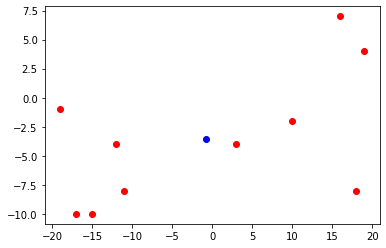

In [120]:
## 공분산 : 두 개의 확률변수 X, Y가 있을 때, 이 두 개의 확률변수의 관계를 보여줄 때 사용 
# 데이터 변하는 경향 알 수 있음. 강도(강하게 결집되어 있느냐)는 알 수 X ->데이터 전체 값이 커지면 커지므로
# 데이터가 평균으로부터 얼마나 떨어져 있느냐를 표현
# 구하는 법 : 두 확률변수의 편차의 곱의 평균으로 표현 

import numpy as np
import matplotlib.pyplot as plt   # 만약 모듈 없으면 conda install matplotlib 해주면 됨 

np.random.seed(4)  # 항상 같은 난수가 발생하도록 seed 처리
x = np.random.randint(-20,20,(10,))  # -20~19 에서 1차원으로 10개 뽑아라
y = np.random.randint(-10,10,(10,))
x_mean = x.mean()
y_mean = y.mean()
x_deviation = x-x.mean()  # 확률변수 X의 편차
y_deviation = y-y.mean()

sum(x_deviation*y_deviation)/9

result = 0;
for i in range(10):
    result += (x_deviation[i]*y_deviation[i])
myCov = result/10   # 모공분산 : 원래 공식
myCov = result/9    # 표준공분산 : (n-1)로 나누어줌 -> 추정치가 좋아짐
    
# ==> np.cov 함수 이용해서 한번에 구할 수 있음
print(np.cov(x,y))  # => x와 x의, x와 y의, y와 x의, y와 y의


    
# scatter(산점도)를 표현해보자
plt.scatter(x,y,color="red")
plt.scatter(x_mean,y_mean,color="blue")
plt.show()
# 평균을 기준으로 사분면으로 나눔 ->1,3사분면은 같은방향, 2,4사분면은 다른방향 
# 1,3 사분면에 값이 많으면 양수, 아니면 음수

# 공분산은 딱히 중요하지 않음. -> but 공분산 이용해서 상관계수를 구할 수 있음 
# 상관계수는 연관정도를 수치로 표현해줌








In [128]:
## 공분산이 양수인경우 (KOSPI 지수와 삼성전자 주가)

# anaconda prompt
# > activate cpu_env
# > pip install pandas_datareader   # conda 하면 아나콘다에는 없어서 python repository에서 찾아서 설치

import numpy as np
import pandas as pd 
import pandas_datareader.data as pdr    # 금융 데이터를 이용하기 위해
from datetime import datetime       # 날짜 사용하기 위해서

# 특정 날짜를 이용해서 금융데이터를 가져올 것 
start = datetime(2018,1,1)    # 시작날짜.-> parse 이용해도 됨
end = datetime(2018,12,31)    # 끝날짜

# ^KS11 : 한국 KOSPI 지수 - yahoo에서 제공하는
df_KOSPI = pdr.DataReader("^KS11", "yahoo", start, end)  # 성공하면 데이터프레임 얻어옴
df_KOSPI.to_json("./data/KOSPI.json")  # json파일로 저장
display(df_KOSPI)

## -> 학원에서 안읽어짐. 
# 제공된 JSON파일을 이용해서 DataFrame을 이용해야 함 
# JSON을 불러들여서 dataframe을 2개 만들자(KOSPI.json, SE.json) 여기서 close만 읽어들이자

import json

file_KOSPI = open("./data/KOSPI.json","r")
file_SE = open("./data/SE.json","r")
# 파일의 내용을 읽어서(json) dict로 변환한 후 dict를 이용해서 DataFrame을 생성
df_KOSPI = pd.DataFrame(json.load(file_KOSPI))
df_SE = pd.DataFrame(json.load(file_SE))
close_KOSPI = df_KOSPI["Close"]
close_SE = df_SE["Close"]

print(np.cov(close_KOSPI,close_SE))



SSLError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/%5EKS11/history?period1=1514746800&period2=1546282799&interval=1d&frequency=1d&filter=history (Caused by SSLError(SSLError(1, '[SSL: UNKNOWN_PROTOCOL] unknown protocol (_ssl.c:852)'),))

In [133]:
## 공분산이 음수인경우 (LIG넥스원과 부산산업을 대상으로 공분산 계산)
import json

file_LIG = open("./data/LIG넥스원.json","r")
file_BS = open("./data/부산산업.json","r")
# 파일의 내용을 읽어서(json) dict로 변환한 후 dict를 이용해서 DataFrame을 생성
df_LIG = pd.DataFrame(json.load(file_LIG))
df_BS = pd.DataFrame(json.load(file_BS))
close_LIG = df_LIG["Close"]
close_BS = df_BS["Close"]

print(np.cov(close_LIG,close_BS))  # 음수값 나오는 것 알 수 있음



[[ 6.35924170e+07 -3.86535936e+08]
 [-3.86535936e+08  4.64762211e+09]]


In [21]:
### 1126

## 상관관계(correlation) : 두 대상이 서로 연관성이 있다고 추측되는 관계
## 상관계수(correlation coefficient) : 일반적으로 피어슨 상관계수를 이용함 (다른 상관계수도 존재)
# 공분산을 각 확률변수의 표준편차의 곱으로 나눠주게 되면 -1~1로 scaling 된다 -> 피어슨 상관계수
# 절댓값이 1에 가까울수록 밀접한 관계 
# 0~0.3 / 0.3~0.6 / 0.7~1  
# 양수일 경우는 양의 상관관계라고 표현
# 음수일 경우는 부적(음의) 상관관계라고 표현 
# 성적 & 자존감 
# 온라인 게임 & 폭력성

## 상관계수는 현재 연관성에 대한 측도이지, 인과관계와는 상관 X
# 인과관계는 회귀분석(regression)을 통해 알 수 있음

import numpy as np
import pandas as pd
import json 

file_KOSPI = open("C:/python_DA/data/KOSPI.json","r")
#df_KOSPI = pd.DataFrame(json.load(file_KOSPI)) #json.load(file_KOSPI) : dictionary -> data frame 만들 수 있음
#display(df_KOSPI.head())
# close라는 컬럼만 떼어오고 싶다
series_KOSPI = pd.DataFrame(json.load(file_KOSPI))["Close"]  

file_SE = open("C:/python_DA/data/SE.json","r")
series_SE  = pd.DataFrame(json.load(file_SE))["Close"]  

file_PUSAN = open("C:/python_DA/data/부산산업.json","r")
series_PUSAN  = pd.DataFrame(json.load(file_PUSAN))["Close"]  

## 상관계수를 구하기 위해서 일단 공분산을 구한 후 각 표준편차의 곱으로 나눠줘야 함
# np.corrcoef() : 상관계수 구하는 함수
print(np.corrcoef(series_KOSPI,series_SE))


## 3개의 series를 data frame으로 만들어보자! - series는 ndarray와 유사
data = {
    "KOSPI" : series_KOSPI,
    "SE" : series_SE,
    "PUSAN" : series_PUSAN
}

df = pd.DataFrame(data)
df.head()
display(df.corr())    # corr: 상관계수  -> np.corrcoef는 numpy에서 사용 / corr만 써줘야 함
display(df.cov())     # cov: 공분산  -> 음, 양만 파악 가능. 강도 표현 X (사용 잘 안함)




[[1.         0.91317306]
 [0.91317306 1.        ]]


,KOSPI,SE,PUSAN
KOSPI,1.000000,0.913173,-0.576688
SE,0.913173,1.000000,-0.468954
PUSAN,-0.576688,-0.468954,1.000000


In [35]:
# 분석용 함수(sum, mean, cov, corr)
## DataFrame에서 sum함수와 mean함수의 사용
import numpy as np
import pandas as pd

# 중첩리스트를 이용해서 DataFrame을 생성해 보자!
data = [[2,np.nan],
        [7,-3],
        [np.nan,np.nan],
        [1,-2]]
df = pd.DataFrame(data,
                  columns =["one","two"],
                  index = ["a","b","c","d"])
display(df)

df.sum()  # DataFrame에서는 sum()함수 default는 axis=0으로 세팅.(행방향-아래로 가는 방향)
# one    10.0
# two    -5.0   -> series로 떨어짐
# NaN은 0으로 간주(없는 걸로 간주) => mean 처리 할 때 주의해야 함!!!!(나눠지는 개수가 달라지므로)

df.sum(axis=1)  
# a    2.0
# b    4.0
# c    0.0
# d   -1.0

df["two"].sum()
df.loc["b"]     # 숫자는 iloc이용! 
df.mean(axis=0, skipna=True)   
# skipna: na를 skip할건지
# False: nan 사용하겠다는 뜻 => 모든 연산결과는 NaN 
# True: 없는 걸로 인식 -> 평균을 3개로 나눠라



## [연습문제] one 컬럼의 결측값은 one 컬럼의 평균으로, two 컬럼의 결측값은 two 컬럼의 최소값으로 대체해보자.
one_avg = df["one"].mean(axis=0, skipna=True) 
two_min = df["two"].min(axis=0)     # axis=0은 default라 생략 가능

# df["one"].dropna  # na 지우는거
df["one"]=df["one"].fillna(value=one_avg)  # 원본이 바뀌지 않으므로 df["one"]에 넣어줘야 함 
df["two"]=df["two"].fillna(value=two_min)

display(df)


,one,two
a,2.0,NaN
b,7.0,-3.0
c,NaN,NaN
d,1.0,-2.0


a    2.000000
b    7.000000
c    3.333333
d    1.000000
Name: one, dtype: float64

In [48]:
## DataFrame의 함수에 대해 조금 더 알아보자! 

# 정렬(sort_index(), sort_values())에 대해 알아보자

import numpy as np
import pandas as pd

np.random.seed(11)
# random으로 정수형 난수를 발생시켜보자
df = pd.DataFrame(np.random.randint(0,10,(6,4)))
display(df)

df.columns = ["A","B","C","D"]
df.index = pd.date_range("20190101",periods=6)
display(df)

random_index = np.random.permutation(df.index)  # 입력으로 들어오는 순열 데이터를 랜덤하게 섞음

df2 = df.reindex(index=random_index,columns=["B","A","D","C"])
display(df2)

# 이제 정렬에 대해 알아보자! 
# sort_index : index, column 다 가능 (column하려면 axis=1)
display(df2.sort_index(axis=0, ascending=True))  # 행단위로 오름차순 정렬  # 원본은 변하지 않음
# sort_value : 값을 가지고 정렬
display(df2.sort_values(by="A"))  # A컬럼의 값들 기준으로 오름차순 정렬 - 행의 순서 바꿔줌
display(df2.sort_values(by=["A","B"]))  # 기본적으로 A값 기준으로. A값 동일하면 B값 기준으로





,0,1,2,3
0,9,0,1,7
1,1,7,2,8
2,0,0,4,2
3,1,5,5,7
4,4,1,8,8
5,1,3,6,2


,A,B,C,D
2019-01-01,9,0,1,7
2019-01-02,1,7,2,8
2019-01-03,0,0,4,2
2019-01-04,1,5,5,7
2019-01-05,4,1,8,8
2019-01-06,1,3,6,2


,B,A,D,C
2019-01-06,3,1,2,6
2019-01-04,5,1,7,5
2019-01-05,1,4,8,8
2019-01-02,7,1,8,2
2019-01-01,0,9,7,1
2019-01-03,0,0,2,4


,B,A,D,C
2019-01-01,0,9,7,1
2019-01-02,7,1,8,2
2019-01-03,0,0,2,4
2019-01-04,5,1,7,5
2019-01-05,1,4,8,8
2019-01-06,3,1,2,6


,B,A,D,C
2019-01-03,0,0,2,4
2019-01-06,3,1,2,6
2019-01-04,5,1,7,5
2019-01-02,7,1,8,2
2019-01-05,1,4,8,8
2019-01-01,0,9,7,1


In [57]:
## unique(), value_count(), isin() 

import numpy as np
import pandas as pd

np.random.seed(1)
df = pd.DataFrame(np.random.randint(0,10,(6,4))) 
df.columns = ["A","B","C","D"]
df.index = pd.date_range("20190101", periods=6) 
#display(df)

## 새로운 컬럼을 만들어 보자! 
df["E"]= ["AA","BB","CC","AA","BB","AA"]  # list형태로 새로운 컬럼 넣음 - ndarray, series로 넣어도 상관 없음
display(df)

# unique() :중복 배제한 유일한 값만 ndarray에 넣어 return 
print(df["E"].unique()) 
# value_counts() : 각 값이 몇 개씩 있는지 series로 return
print(df["E"].value_counts()) 
# isin() : 각 요소가 이 안에 있는지 - boolean mask가 return
print(df["E"].isin(["AA","CC"]))  




,A,B,C,D,E
2019-01-01,5,8,9,5,AA
2019-01-02,0,0,1,7,BB
2019-01-03,6,9,2,4,CC
2019-01-04,5,2,4,2,AA
2019-01-05,4,7,7,9,BB
2019-01-06,1,7,0,6,AA


['AA' 'BB' 'CC']
AA    3
BB    2
CC    1
Name: E, dtype: int64
2019-01-01     True
2019-01-02    False
2019-01-03     True
2019-01-04     True
2019-01-05    False
2019-01-06     True
Freq: D, Name: E, dtype: bool


In [61]:
## apply()함수 + 람다식 활용 
## 람다식 - 수행코드 한줄짜리 (이름없는 함수)

import numpy as np
import pandas as pd

np.random.seed(1)
df = pd.DataFrame(np.random.randint(0,10,(6,4))) 
df.columns = ["A","B","C","D"]
df.index = pd.date_range("20190101", periods=6) 
#display(df)


## 컬럼을 하나 더 만들어보자. - 각 행의 최대값-최소값
# lambda 
func = lambda x: x.max()-x.min()    # x: 입력인자 , : 뒤의 내용이 return 됨
# apply함수 사용
df["최대-최소"] = df.apply(func,axis=1)  # axis=1 열방향으로 함수 호출해라 / 행방향이면 아래로 갈 것
# dataframe, series 등에 적용 가능. -> dataframe에는 axis 지정해줘야 함 
display(df)



,A,B,C,D,최대-최소
2019-01-01,5,8,9,5,4
2019-01-02,0,0,1,7,7
2019-01-03,6,9,2,4,7
2019-01-04,5,2,4,2,3
2019-01-05,4,7,7,9,5
2019-01-06,1,7,0,6,7


In [ ]:
### 지금까지 한 내용 - DataFrame의 함수
## 분석용 함수(sum, mean, cov, corr)
## 정렬(sort_index(), sort_values())
## unique(), value_count(), isin() 함수
## 람다식 활용




In [75]:
## DataFrame Merge(결합) 
# inner join : 둘다 존재하는 것
# outer join(R의 full join)
# left join
# right join
import numpy as np
import pandas as pd

data1 = {
    "학번": [1,2,3,4],
    "이름":["홍길동","최길동","아이유","김연아"],
    "학년":[2,3,3,1]
}
data2 = {
    "학번":[1,2,4,5],
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# display(df1); display(df2)

## 1. merge 이용해서 결합해보자
pd.merge(df1,df2,on="학번",how="inner")  # 1,2,4
pd.merge(df1,df2,on="학번",how="left")   # 1,2,3,4
pd.merge(df1,df2,on="학번",how="right")  # 1,2,4,5
pd.merge(df1,df2,on="학번",how="outer")  # 1,2,3,4,5

## 2. 만약 컬럼명 다를 경우(학번이라고 없고 학생학번이라는 이름일 경우)
data2 = {
    "학생학번":[1,2,4,5],
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df2 = pd.DataFrame(data2)
pd.merge(df1,df2,
         left_on="학번",
         right_on="학생학번",
         how="outer")  # 결과에 학번, 학생학번 둘 다 나옴

## 3. 위에꺼는 column, 밑에꺼는 index로 가지고 있을 경우 (학번 컬럼 없을 경우)
data2 = {
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df2 = pd.DataFrame(data2)
df2.index = [1,2,4,5]  
pd.merge(df1,df2,
         left_on="학번",
         right_index=True,  
         how="outer")

## 4. 둘다 index로도 가능


data1 = {
    "이름":["홍길동","최길동","아이유","김연아"],
    "학년":[2,3,3,1]
}
data2 = {
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1.index = [1,2,3,4]
df2.index = [1,2,4,5]  

pd.merge(df1,df2,
         left_index=True,
         right_index=True,  
         how="outer")


,이름,학년,학과,학점
1,홍길동,2.0,컴퓨터,1.3
2,최길동,3.0,미술,3.5
3,아이유,3.0,NaN,NaN
4,김연아,1.0,철학,4.3
5,NaN,NaN,사회,2.3


In [83]:
## Series 연결해서 DataFrame 생성하는 방법
import numpy as np
import pandas as pd

s1 = pd.Series([0,1],index=["a","c"])
s2 = pd.Series([4,3,2], index=["b","c","e"])

# concat(): 연결 -> 연결할 것을 list 형태로
print( pd.concat([s1,s2],axis=0) )   # Series 연결
# a    0
# c    1
# b    4
# c    3
# e    2
print( pd.concat([s1,s2],axis=1,sort=True) )   # DataFrame - 옆으로 붙이고 없는 칸들은 NaN
#      0    1
# a  0.0  NaN
# b  NaN  4.0
# c  1.0  3.0
# e  NaN  2.0









a    0
c    1
b    4
c    3
e    2
dtype: int64


In [9]:
###  1127 
### multi index
import numpy as np
import pandas as pd

np.random.seed(1)

## 간단하게 Series를 하나 생성해 보자! 
s = pd.Series(np.random.randint(1,5,(6,)),
              index=[["총무처","관리처","정보전산처","총무처","관리처","정보전산처"], # pandas는 계층형 index 사용 가능
                     ["인력개발팀","건축팀","개발팀","재무팀","안전팀","운영팀"]])  # 각 부서에 몇명있는지 뽑을 수 있음
# print(s)

## 총무처만 추출해 보자! 
s["총무처"]
## 관리처와 정보전산처를 추출해 보자!  => Fancy Indexing
s[["관리처","정보전산처"]] 

### 1차 인덱스와 2차 인덱스를 이용해서 데이터를 추출해 보자! 
## 총무처의 재무팀 인원은 몇명인가? => tuple 이용 
s[("총무처","재무팀")]    # (첫번째 index, 두번째 index) => 총무처 index 중 재무팀을 찾아
# 튜플은 괄호 생략 가능
s["총무처","재무팀"]  # Series의 1차 index, 2차 index
# cf) s["총무처","관리처"]  # 에러!!

## 부처에 상관없이 재무팀 뽑아라
s[:,"재무팀"]    # 1차 index 다, 2차 index 재무팀
# cf) s[(:,"재무팀")]  에러! 문법적으로 오류남 
# :을 이용을 할 때는 튜플기호()를 생략하고 사용해야 함



1

In [29]:
## DataFrame의 다중 index 
import numpy as np
import pandas as pd

np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),  # 1234중 
                  index=[["총무처","관리처","정보전산처","총무처","관리처","정보전산처"],
                         ["인력개발팀","건축팀","개발팀","재무팀","안전팀","운영팀"]],
                  columns=[["아시아","유럽","아시아","유럽","아시아"],
                           ["한국","독일","일본","프랑스","중국"]])
#display(df)

## 보기 너무 힘듦! -> 정렬해보자
new_df = df.sort_index(axis=0) 
new_df = new_df.sort_index(axis=1)
#display(new_df)

## 유럽지역만 추출 -> DataFrame
df["유럽"]
## 아시아지역의 한국만 추출
df[("아시아","한국")]   # Series로 return 

## 지역에 상관 없이 총무처 정보만 추출 => DataFrame
new_df.loc["총무처"]  # 총무처 행만 들고옴

## 총무처의 재무팀만 추출
new_df.loc[("총무처","재무팀")]

## 아시아 지역 중국의 정보전산처 개발팀 인원은?
new_df.loc[("정보전산처","개발팀"),("아시아","중국")]  # 튜플 생략 불가



3

In [43]:
### 정렬
import numpy as np
import pandas as pd

np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),  # 1234중 
                  index=[["총무처","관리처","정보전산처","총무처","관리처","정보전산처"],
                         ["인력개발팀","건축팀","개발팀","재무팀","안전팀","운영팀"]],
                  columns=[["아시아","유럽","아시아","유럽","아시아"],
                           ["한국","독일","일본","프랑스","중국"]])

## index에 이름 붙여보자
df.index.names=["부처","팀"]
## column에 이름 붙여보자
df.columns.names=["대륙","국가"]
#display(df)

## 팀 이름으로 행을 내림차순으로 정렬
df.sort_index(axis=0,level=1,ascending=False)  # level=0은 1차index, level=1은 2차index/ ascending=False: 내림차순
df.sort_index(axis=0,level="팀",ascending=False)  # 이렇게 써도 똑같음

## 국가별로 컬럼을 오름차순으로 정렬
df.sort_index(axis=1,level=1)

## => index별로(1차,2차) 모두 정렬 가능


## 값을 이용해서 정렬할 수 있음 
## 아시아 지역의 한국 직원 수를 기준으로 내림차순 정렬해라 
df.sort_values(by=("아시아","한국"), ascending=False)

## 아시아지역의 한국 직원 수를 기준으로 내림차순 정렬하고, 만약 동률이 존재할 경우 아시아 일본 직원수 기준으로 오름차순 정렬
df.sort_values(by=[("아시아","한국"),("아시아","일본")],ascending=[False,True])


,대륙,아시아,유럽,아시아,유럽,아시아
,국가,한국,독일,일본,프랑스,중국
부처,팀,,,,,
정보전산처,운영팀,4,2,2,3,3
관리처,건축팀,4,1,3,3,1
총무처,재무팀,3,2,1,1,4
정보전산처,개발팀,3,2,3,3,3
관리처,안전팀,1,4,1,3,1
총무처,인력개발팀,1,1,4,4,4


In [56]:
### DataFrame에 대한 sum(),mean()

import numpy as np
import pandas as pd

np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),  # 1234중 
                  index=[["총무처","관리처","정보전산처","총무처","관리처","정보전산처"],
                         ["인력개발팀","건축팀","개발팀","재무팀","안전팀","운영팀"]],
                  columns=[["아시아","유럽","아시아","유럽","아시아"],
                           ["한국","독일","일본","프랑스","중국"]])
df.index.names=["부처","팀"]
df.columns.names=["대륙","국가"]

## 각 도시별 직원 수의 합은? (행방향으로 더해라)
df.sum(axis=0)
## 각 도시 부처별 직원수의 합은?
df.sum(axis=0,level="부처")
## 각 도시 팀별 직원수 합?
df.sum(axis=0,level=1)
## 모든 지역의 각 부처-팀별 평균 인원은? (한국독일일본프랑스중국/각팀별 평균)
df.mean(axis=1)


부처     팀    
총무처    인력개발팀    2.8
관리처    건축팀      2.4
정보전산처  개발팀      2.8
총무처    재무팀      2.2
관리처    안전팀      2.0
정보전산처  운영팀      2.8
dtype: float64

In [62]:

import numpy as np
import pandas as pd

df = pd.DataFrame({"이름":["홍길동","김연아","아이유","김길동","신사임당"],
                   "성적":[1.5,4.4,4.5,2.3,4.0],
                   "학과":["컴퓨터","철학","컴퓨터","철학","컴퓨터"],
                   "학년":[1,2,3,2,2]})
#display(df)

## set_index(): column - index 변경
## 학과 column을 index로 변경 
new_df = df.set_index("학과")
display(new_df)
## 2개의 index 
new_df = df.set_index(["학과","학년"]) # 1차index, 2차index
display(new_df)
## reset_index() : 원래 상태로 복구
origin_df = new_df.reset_index()
display(origin_df)  



,이름,성적,학년
학과,,,
컴퓨터,홍길동,1.5,1
철학,김연아,4.4,2
컴퓨터,아이유,4.5,3
철학,김길동,2.3,2
컴퓨터,신사임당,4.0,2


,,이름,성적
학과,학년,,
컴퓨터,1,홍길동,1.5
철학,2,김연아,4.4
컴퓨터,3,아이유,4.5
철학,2,김길동,2.3
컴퓨터,2,신사임당,4.0


,학과,학년,이름,성적
0,컴퓨터,1,홍길동,1.5
1,철학,2,김연아,4.4
2,컴퓨터,3,아이유,4.5
3,철학,2,김길동,2.3
4,컴퓨터,2,신사임당,4.0


In [72]:
import numpy as np
import pandas as pd

np.random.seed(1)

df = pd.DataFrame(np.random.randint(1,5,(2,3)),
                  index = ["서울","부산"],
                  columns=["마케팅","개발","운영"])
display(df)
## stack()
new_df = df.stack()  # column을 index의 최하위 index로 생성 -> series형태
display(new_df)
## unstack()
origin_df = new_df.unstack() # 반대. 여기서는 원래상태로 돌려줌 
display(origin_df)  # data frame형태
## unstack(level=0) : column - index 바꿔줌
origin_df = new_df.unstack(level=0)  
display(origin_df) 


,마케팅,개발,운영
서울,2,4,1
부산,1,4,2


서울  마케팅    2
    개발     4
    운영     1
부산  마케팅    1
    개발     4
    운영     2
dtype: int32

,마케팅,개발,운영
서울,2,4,1
부산,1,4,2


,서울,부산
마케팅,2,1
개발,4,4
운영,1,2


In [75]:
## 중복행 제거(추출)
import numpy as np
import pandas as pd

df = pd.DataFrame({"k1":["one"]*3+["two"]*4,
                   "k2":[1,1,2,3,3,4,4]})
display(df)

df.duplicated()  # mask 나옴 - 중복항에 대한 boolean mask => 이용해서 행 뽑아낼 때 사용
df.loc[df.duplicated(),:]   # 중복항인것 뽑기
df.loc[~df.duplicated(),:]  # 중복항 아닌 것 뽑기
df.drop_duplicates()  # 중복항 제거할 때 쓰는 함수 -> 중복항 하나 남기고 나머지 남기기

## 우리가 사용할 데이터를 정제할 때 중복항을 제거하자 


,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [85]:
## DataFrame의 Grouping

df = pd.DataFrame({"이름":["홍길동","김연아","아이유","김길동","신사임당"],
                   "성적":[1.5,4.4,4.5,2.3,4.0],
                   "학과":["컴퓨터","철학","컴퓨터","철학","컴퓨터"],
                   "학년":[1,2,3,2,2]})

## 학과를 기준으로 (성적을) grouping
dept = df["성적"].groupby(df["학과"])
dept.mean()

## 학과와 학년을 기준으로 (성적을) grouping
# 컴퓨터1,컴퓨터2, 컴퓨터3, 철학2 -> 4개의 그룹
dept = df["성적"].groupby([df["학과"],df["학년"]]) # 1차index, 2차index
display(dept.mean())

dept = df["성적"].groupby([df["학과"],df["학년"]]) 
dept.mean().unstack()


학과   학년
철학   2     3.35
컴퓨터  1     1.50
     2     4.00
     3     4.50
Name: 성적, dtype: float64

학년,1,2,3
학과,,,
철학,NaN,3.35,NaN
컴퓨터,1.5,4.00,4.5


In [146]:
##### -> pandas 내용 끝!!

# mpg data set 시작해보자.(차량 제조사, 도시연비, 고속도로 연비 등 )
# R에서 데이터 추출해서 CSV 파일로 만들고 이거 이용해서 pandas에서 DataFrame을 만들고 pandas를 통해 문제를 해결해보자! 
import numpy as np
import pandas as pd

df = pd.read_csv("./data/mpg.csv")
display(df.head())


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [87]:
# 1. displ(배기량)이 4 이하인 자동차와 5 이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)가 평균적으로 더 높은지 확인하세요.
# 답: 배기량 4이하 : 25.96319
#     배기량 5이상 : 18.07895

mean_4 = df[df["displ"]<=4]["hwy"].mean()
mean_5 = df[df["displ"]>=5]["hwy"].mean()
result ={"4이하":mean_4,"5이상":mean_5})
print(result)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


0      1.8
1      1.8
2      2.0
3      2.0
4      2.8
      ... 
229    2.0
230    2.0
231    2.8
232    2.8
233    3.6
Name: displ, Length: 234, dtype: float64

In [119]:
# 2. 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
# "audi"와 "toyota" 중 어느 manufacturer(제조회사)의 cty(도시 연비)가 평균적으로 더 높은지 확인하세요.
# 답: audi : 17.6
#     toyota : 18.5
audi_mean = df[df["manufacturer"]=="audi"]["cty"].mean()
toyota_mean = df[df["manufacturer"]=="toyota"]["cty"].mean()
print("audi:{}, toyota:{}".format(audi_mean,toyota_mean))


audi:17.61111111111111, toyota:18.529411764705884


In [125]:
# 3. "chevrolet", "ford", "honda" 자동차의 고속도로 연비 평균을 알아보려고 한다. 
# 이 회사들의 데이터를 추출한 후 hwy(고속도로 연비) 전체 평균을 구하세요.
# 답: hwy 전체 평균 : 22.50943
m = df[df["manufacturer"].isin(["chevrolet","ford","honda"])]["hwy"].mean()
m = round(m,5)
print("hwy 전체 평균:{}".format(m))


hwy 전체 평균:22.50943


In [131]:
# 4. "audi"에서 생산한 자동차 중에 어떤 자동차 모델의 hwy(고속도로 연비)가 높은지 알아보려고 한다. 
# "audi"에서 생산한 자동차 중 hwy가 1~5위에 해당하는 자동차의 데이터를 출력하세요.
#답:     audi   a4            2.0     ~~~~~ 31
#        audi   a4            2.0     ~~~~~ 30
#        audi   a4            1.8     ~~~~~ 29
#        audi   a4            1.8     ~~~~~ 29
#        audi   a4 quattro  2.0     ~~~~~ 28

new_df = df[df["manufacturer"]=="audi"]
new_df.sort_values(by="hwy",ascending=False).head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [173]:
# 5. mpg 데이터는 연비를 나타내는 변수가 2개입니다. 
# 두 변수를 각각 활용하는 대신 하나의 통합 연비 변수를 만들어 사용하려 합니다. 
# 평균 연비 변수는 두 연비(고속도로와 도시)의 평균을 이용합니다. 
# 회사별로 "suv" 자동차의 평균 연비를 구한후 내림차순으로 정렬한 후 1~5위까지 데이터를 출력하세요.
# 답:  subaru   21.9
#      toyota   16.3
#      nissan    15.9
#      mercury  15.6
#      jeep       15.6
df2 = df
df2["mpg"] = (df2["hwy"]+df2["cty"])/2

df3 = df2[df2["class"]=="suv"]
df4 = df3["mpg"].groupby(df3["manufacturer"])
pd.DataFrame(df4.mean()).sort_values(by="mpg",ascending=False).head().round(1)


,mpg
manufacturer,
subaru,21.9
toyota,16.3
nissan,15.9
mercury,15.6
jeep,15.6


In [175]:
# 6. mpg 데이터의 class는 "suv", "compact" 등 자동차의 특징에 따라 일곱 종류로 분류한 변수입니다. 
# 어떤 차종의 도시 연비가 높은지 비교하려 합니다. 
# class별 cty 평균을 구하고 cty 평균이 높은 순으로 정렬해 출력하세요.
# 답: subcompact    20.4
#     compact         20.1
#     midsize          18.8
#     minivan          15.8
#     2seater           15.4
#     suv                13.5
#     pickup            13

df2 = df["cty"].groupby(df["class"])
pd.DataFrame(df2.mean()).sort_values(by="cty",ascending=False).round(1)


,cty
class,
subcompact,20.4
compact,20.1
midsize,18.8
minivan,15.8
2seater,15.4
suv,13.5
pickup,13.0


In [177]:
# 7. 어떤 회사 자동차의 hwy(고속도로 연비)가 가장 높은지 알아보려 합니다. 
# hwy(고속도로 연비) 평균이 가장 높은 회사 세 곳을 출력하세요.
# 답:  honda         32.6
#      volkswagen  29.2
#      hyundai       26.9  

df2 = df["hwy"].groupby(df["manufacturer"])
pd.DataFrame(df2.mean()).sort_values("hwy",ascending=False).head(3).round(1)

,hwy
manufacturer,
honda,32.6
volkswagen,29.2
hyundai,26.9


In [188]:
# 8. 어떤 회사에서 "compact" 차종을 가장 많이 생산하는지 알아보려고 합니다. 
# 각 회사별 "compact" 차종 수를 내림차순으로 정렬해 출력하세요.
# 답: audi           15
#      volkswagen  14
#      toyota         12
#      subaru         4
#      nissan          2
df2 = df[df["class"]=="compact"]
df3 = df2.groupby(df["manufacturer"])
pd.DataFrame(df3["class"].count().sort_values(ascending=False))

,class
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [1]:
### [연습문제]movie.csv와 ratings.csv를 이용하여 다음의 문제를 풀어라

import numpy as np
import pandas as pd

movies = pd.read_csv("./data/movies.csv")
ratings = pd.read_csv("./data/ratings.csv")

display(movies.head())
display(ratings.head())


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
## DataFrame Merge(결합) 
# inner join : 둘다 존재하는 것
# outer join(R의 full join)
# left join
# right join
import numpy as np
import pandas as pd

data1 = {
    "학번": [1,2,3,4],
    "이름":["홍길동","최길동","아이유","김연아"],
    "학년":[2,3,3,1]
}
data2 = {
    "학번":[1,2,4,5],
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# display(df1); display(df2)

## 1. merge 이용해서 결합해보자
pd.merge(df1,df2,on="학번",how="inner")  # 1,2,4
pd.merge(df1,df2,on="학번",how="left")   # 1,2,3,4
pd.merge(df1,df2,on="학번",how="right")  # 1,2,4,5
pd.merge(df1,df2,on="학번",how="outer")  # 1,2,3,4,5

## 2. 만약 컬럼명 다를 경우(학번이라고 없고 학생학번이라는 이름일 경우)
data2 = {
    "학생학번":[1,2,4,5],
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df2 = pd.DataFrame(data2)
pd.merge(df1,df2,
         left_on="학번",
         right_on="학생학번",
         how="outer")  # 결과에 학번, 학생학번 둘 다 나옴

## 3. 위에꺼는 column, 밑에꺼는 index로 가지고 있을 경우 (학번 컬럼 없을 경우)
data2 = {
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df2 = pd.DataFrame(data2)
df2.index = [1,2,4,5]  
pd.merge(df1,df2,
         left_on="학번",
         right_index=True,  
         how="outer")

## 4. 둘다 index로도 가능


data1 = {
    "이름":["홍길동","최길동","아이유","김연아"],
    "학년":[2,3,3,1]
}
data2 = {
    "학과":["컴퓨터","미술","철학","사회"],
    "학점":[1.3,3.5,4.3,2.3]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1.index = [1,2,3,4]
df2.index = [1,2,4,5]  

pd.merge(df1,df2,
         left_index=True,
         right_index=True,  
         how="outer")

In [ ]:
# 1. 사용자가 평가한 모든 영화의 전체 평균 평점




In [ ]:
# 2. 각 사용자별 평균 평점




In [ ]:
# 3. 각 영화별 평균 평점




In [ ]:
# 4. 평균 평점이 가장 높은 영화의 제목(동률이 있을 경우 모두 출력)




In [ ]:
# 5. Comedy 영화 중 가장 평점이 낮응 영화의 제목 (동률이 있을 경우 모두 출력)




In [ ]:
# 6. 2015년도에 평가된 모든 Ramance 영화의 평균 평점


